The purpose of this test is to see if I can use the varianse of particles to filter out matches over paltinum etc.

In [1]:
import mrcfile

In [21]:
with mrcfile.mrcmemmap.MrcMemmap('/scratch/erice/elferich/frealign_thp1/stack_300k_2A.mrc') as mrc:
    variances = [(i+1, mrc.data[i].var()) for i in range(15000)]
variances

[(1, 0.9999998),
 (2, 0.9999998),
 (3, 0.9999999),
 (4, 0.99999994),
 (5, 0.99999994),
 (6, 0.9999999),
 (7, 0.99999976),
 (8, 0.99999976),
 (9, 0.99999994),
 (10, 0.99999994),
 (11, 1.0),
 (12, 1.0),
 (13, 1.0),
 (14, 0.9999997),
 (15, 1.0000001),
 (16, 0.9999999),
 (17, 1.0),
 (18, 1.0000002),
 (19, 1.0),
 (20, 1.0),
 (21, 0.9999999),
 (22, 1.0000001),
 (23, 1.0),
 (24, 1.0000001),
 (25, 1.0),
 (26, 0.9999999),
 (27, 1.0),
 (28, 0.99999994),
 (29, 0.9999999),
 (30, 1.0000001),
 (31, 1.0),
 (32, 1.0),
 (33, 0.9999998),
 (34, 1.0),
 (35, 1.0),
 (36, 0.9999999),
 (37, 1.0),
 (38, 1.0000001),
 (39, 1.0000001),
 (40, 0.99999994),
 (41, 0.99999994),
 (42, 0.9999999),
 (43, 0.99999994),
 (44, 1.0),
 (45, 0.9999999),
 (46, 1.0000001),
 (47, 1.0),
 (48, 0.99999976),
 (49, 0.9999999),
 (50, 1.0),
 (51, 1.0),
 (52, 0.99999994),
 (53, 1.0000002),
 (54, 1.0000002),
 (55, 1.0),
 (56, 0.9999999),
 (57, 0.99999994),
 (58, 1.0),
 (59, 1.0000001),
 (60, 1.0000002),
 (61, 1.0),
 (62, 1.0),
 (63, 1.0000

(array([2.000e+00, 7.500e+01, 1.450e+02, 1.825e+03, 3.041e+03, 2.435e+03,
        5.051e+03, 2.127e+03, 0.000e+00, 2.990e+02]),
 array([0.99999952, 0.99999958, 0.9999997 , 0.99999976, 0.99999988,
        0.99999994, 1.        , 1.00000012, 1.00000024, 1.00000024,
        1.00000036]),
 <BarContainer object of 10 artists>)

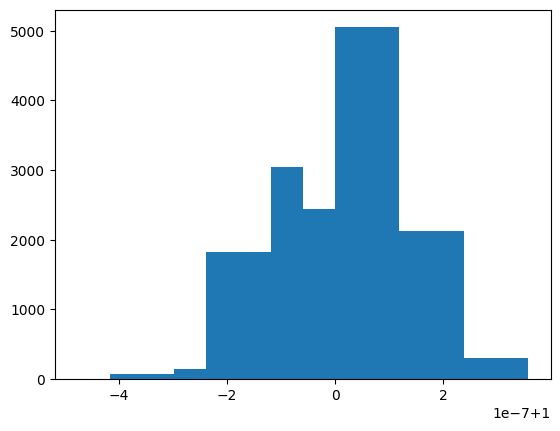

In [20]:
import matplotlib.pyplot as plt
plt.hist([i[1] for i in variances])

In [12]:
for i in variances:
    if i[1] > 0.2:
        print(i[0])

54
57
58
59
60
61
62
63
65
68
69
71
73
128
134
355
356
357
909
914
915
918
919
921
923
925
926
927
1936
1939
1940
1942
1943
1945
3154
3155
3156
4528
4666
4696
4719
5056
5063
5066
5067
5073
5074
5075
5081
5082
5083
5084
5085
5087
5088
5091
5093
5094
5527
5565
5626
6207
6209
6285
6287
7508
8138
8140
8141
8810
9062
9132
9145
9185
9186
9256
9260
9425
9426
9427
9429
9431
9436
9439
9440
9441
9444
9445
9447
9449
9452
9453
9456
9458
9459
9460
9461
9463
10029
10530
10532
10533
10534
10535
10536
10538
10539
10988
10994
10995
10996
10997
10998
10999
11001
11003
11004
11005
11006
11007
11008
11011
11013
11014
11015
11017
11020
11051
11063
11070
11095
11956
11957
11967
12262
12270
12271
12310
12340
12342
12344
12345
12346
12347
12348
12349
12351
12353
12359
12360
12362
12363
12364
12365
12366
12369
12371
12372
12373
12374
12376
12377
12379
12381
12386
12390
12395
12398
12400
12407
12408
12409
12410
12412
12414
12418
12422
12432
12462
12463
12583
12977
12980
13193
13195
13335
13351
13354
13360
13371

This is playing around with the precomputed values for filters

In [17]:
import starfile
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
files = Path("/nrs/elferich/THP1_brequinar/cistem_projects/").glob("*/Assets/TemplateMatching/*filtervalues.star")
files = [ starfile.read(f) for f in files]
values = pd.concat(files, ignore_index=True)

Text(0.5, 0, 'Distance to mask')

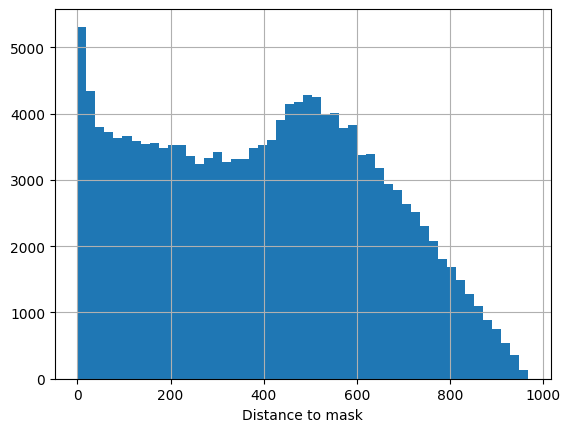

In [21]:
values["LACEBeamEdgeDistance"].hist(bins=50)
plt.xlabel("Distance to mask")

<Axes: >

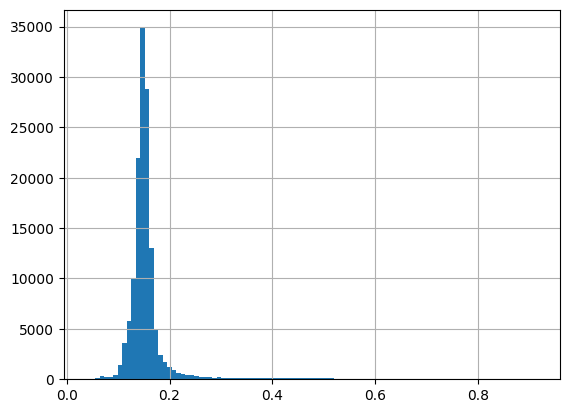

In [22]:
values["LACEVarianceAfterBinning"][values["LACEVarianceAfterBinning"]>0].hist(bins=100, label="variance")